In [91]:

#Author : Navneet Kumar
#Co-Author: Ayush jain

In [92]:
import cv2
import mediapipe as mp
import time
import numpy as np
import matplotlib.pyplot as plt

In [93]:
import math
def closed_fingers(lmlist,img):
    fingers = []
    if len(lmlist) > 20:  # Ensure all landmarks are present
        cv2.putText(img, "Hand Detected", (10,50), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)
        # Thumb
        if lmlist[4][2] > lmlist[3][2]:
            fingers.append("Thumb")
        # Index finger
        if lmlist[8][2] > lmlist[6][2]:
            fingers.append("Index")
        # Middle finger
        if lmlist[12][2] > lmlist[10][2]:
            fingers.append("Middle")
        # Ring finger
        if lmlist[16][2] > lmlist[14][2]:
            fingers.append("Ring")
        # Pinky
        if lmlist[20][2] > lmlist[18][2]:
            fingers.append("Pinky")

    return fingers

def finger_close_dist(tip,adj,zero):
    #two adjacent points on same finger
    # distance from zero to tip 
    dist1 = math.sqrt((zero[0] - tip[0])**2 + (zero[1] - tip[1])**2)
    dist2 =  math.sqrt((zero[0] - adj[0])**2 + (zero[1] - adj[1])**2)
    if(dist2>=dist1):
        return True
    else:
        return False

def closed_fingers_v2(lmlist,img):
    fingers = []
    if len(lmlist) > 20:  # Ensure all landmarks are present
        cv2.putText(img, "Hand Detected", (10,50), cv2.FONT_HERSHEY_PLAIN, 3, (255,255,255), 3)
        zero= lmlist[0][1],lmlist[0][2]
        # Thumb
        if finger_close_dist(lmlist[4][1:3],lmlist[3][1:3],zero):
            #add extra checks for thumb

            fingers.append("Thumb")
        # Index finger
        if finger_close_dist(lmlist[8][1:3],lmlist[6][1:3],zero):
            fingers.append("Index")
        # Middle finger
        if finger_close_dist(lmlist[12][1:3],lmlist[10][1:3],zero):
            fingers.append("Middle")
        # Ring finger
        if finger_close_dist(lmlist[16][1:3],lmlist[14][1:3],zero):
            fingers.append("Ring")
        # Pinky
        if finger_close_dist(lmlist[20][1:3],lmlist[18][1:3],zero):
            fingers.append("Pinky")
            
    return fingers

def up_fingers(closed_list):
    open_fingers=['Thumb','Index','Middle','Ring','Pinky']
    for i in closed_list:
        open_fingers.remove(i)
    return open_fingers

def ispointing(closedfingers,img):
    if 'Middle' in closedfingers and 'Ring' in closedfingers and 'Pinky' in closedfingers and 'Index' not in closedfingers:
        cv2.putText(img, "Pointing", (10,100), cv2.FONT_HERSHEY_PLAIN, 3, (255,255,255), 3)
        return True
    return False


    

        

In [94]:

class writer:
    def __init__(self):
        self.points=[]
        self.Zdist=-0.05
        self.thres=0.03
        self.dir='bi'
        self.writethres=0
    def calibrate(self,currentZ,thres,dir,writethres):

        self.Zdist=currentZ
        self.thres=thres
        self.dir=dir
        self.writethres=writethres
    def on_canvas(self,point):
        if(self.dir=='bi'):
            if(abs(point.z-self.Zdist)<self.thres):
                return True
            return False
        elif(self.dir=='uni1'):
            if(point.z<self.Zdist):
                return True
            return False
        elif(self.dir=='uni2'):
            if(point.z>self.Zdist):
                return True
            return False
      
    def write(self,point):
        if(self.on_canvas(point)):
            self.points.append(point)
        # if len(self.points)>1:
            # cv2.line(self.img,self.points[-2],self.points[-1],(255,0,0),5)
    def writeV2(self,point):
        # compare with last point
        if(len(self.points)>1):
            if(math.sqrt((self.points[-1].x-point.x)**2 + (self.points[-1].y-point.y)**2)<self.writethres and self.on_canvas(point)):
                self.points.append(point)
                return True
        elif(self.on_canvas(point)):
            self.points.append(point)
            return True

        return False
    def writeV3(self,point,timegap):
        # check time gap between two points
        if(len(self.points)>0):
            if(timegap<0.5 and self.on_canvas(point)):
                self.points.append(point)
                return True
        elif(self.on_canvas(point)):
            self.points.append(point)
            return True

    def clear(self):
        self.points.clear()
    # def make_line(self,img):
    #     if len(self.points)>1:
    #         for i in range(len(self.points)-1):
    #             cv2.line(self.img,self.points[i],self.points[i+1],(255,0,0),5)
    def draw(self,img):
        if len(self.points)>1:
            for i in range(len(self.points)-1):
                cv2.line(img,(int(self.points[i].x),int(self.points[i].y)),(int(self.points[i+1].x),int(self.points[i+1].y)),(255,0,0),10)
        return img
    def draw2(self,img,color):
        if len(self.points)>1:
            for i in range(len(self.points)-1):
                cv2.line(img,(int(self.points[i].x),int(self.points[i].y)),(int(self.points[i+1].x),int(self.points[i+1].y)),color,20)
        return img
    def range_points(self):
        if len(self.points)>1:
            x_max=self.points[0].x
            x_min=self.points[0].x
            y_max=self.points[0].y
            y_min=self.points[0].y
            for i in self.points:
                if i.x>x_max:
                    x_max=i.x
                if i.x<x_min:
                    x_min=i.x
                if i.y>y_max:
                    y_max=i.y
                if i.y<y_min:
                    y_min=i.y
            return x_min,x_max,y_min,y_max
        return 0,0,0,0

In [95]:
class Mypoint:
    def __init__(self,x,y,z):
        self.x=x
        self.y=y
        self.z=z


In [96]:
def Draw(img,points):
    if len(points)>1:
        for i in range(len(points)-1):
            cv2.line(img,(int(points[i].x),int(points[i].y)),(int(points[i+1].x),int(points[i+1].y)),(255,0,0),5)
            

In [97]:
#a 10 length numpy array
pointer_table=np.zeros(10,dtype=bool)


In [98]:
import cv2
import threading

class VideoCaptureThreading:
    def __init__(self, src=0):
        self.src = src
        self.cap = cv2.VideoCapture(self.src)
        self.grabbed, self.frame = self.cap.read()
        self.started = False
        self.read_lock = threading.Lock()

    def set(self, var1, var2):
        self.cap.set(var1, var2)

    def start(self):
        if self.started:
            print('[!] Threaded video capturing has already been started.')
            return None
        self.started = True
        self.thread = threading.Thread(target=self.update, args=())
        self.thread.start()
        return self

    def update(self):
        while self.started:
            grabbed, frame = self.cap.read()
            with self.read_lock:
                self.grabbed = grabbed
                self.frame = frame

    def read(self):
        with self.read_lock:
            frame = self.frame.copy()
            grabbed = self.grabbed
        return grabbed, frame

    def stop(self):
        self.started = False
        self.thread.join()

    def __exit__(self, exec_type, exc_value, traceback):
        self.cap.release()

In [99]:
# load the model tensorflow\
from tensorflow.keras.models import load_model
model=load_model('model.h5')

In [100]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,028 (5.29 MB)

 Trainable params: 1,386,026 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [101]:
def preprocess_image(img):
    img = cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape(1, 28, 28, 1)

    return img

In [102]:
import threading
import time
cap = cv2.VideoCapture(0)
# cap = VideoCaptureThreading(0)
# cap.start()

CALIZ=-0.0
THRES=0.03
DIR='uni1'
WRITETHRES=1000000
NUM_TRACK_FRAMES=5

mpHands = mp.solutions.hands
hands = mpHands.Hands(static_image_mode=False,
                      max_num_hands=1,
                      min_detection_confidence=0.5,
                      min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

pTime = 0
cTime = 0
wr = writer()
wr.calibrate(currentZ=CALIZ,thres=THRES,dir=DIR,writethres=WRITETHRES)
Writers=[]
Writers.append(wr)
## POINTER TRACK TABLE
#a 10 length numpy array to track last num_track_frames frames pointing status
num_track_frames=NUM_TRACK_FRAMES
pointer_table=np.zeros(num_track_frames,dtype=bool)
pointer_table[0]=True
print(pointer_table)

last_time_pointer=False
this_time_pointer=True

Time_Instant=time.time()

while True:
 
    try:
        success, img = cap.read()
        img=cv2.flip(img,1)
  
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
       
        results = hands.process(imgRGB)
        #print(results.multi_hand_landmarks)
        lmlist = []
       
        if results.multi_hand_landmarks:
            for handLms in results.multi_hand_landmarks:
                # mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS,
                # # mpDraw.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=4),
                # mpDraw.DrawingSpec(color=(0, 0, 255), thickness=, circle_radius=2))  # Increased thickness

                for id, lm in enumerate(handLms.landmark):
                    #print(id,lm)
                    h, w, c = img.shape
                    cx, cy = int(lm.x *w), int(lm.y*h)
                    cz= lm.z
                    #if id ==0:
                    # cv2.circle(img, (cx,cy), 3, (255,0,255), cv2.FILLED)
                    # circle with numbers

                    
                    cv2.putText(img, str(id), (cx,cy), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,0), 1)
                    lmlist.append([id, cx, cy, cz])

                mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS)       

        def closed_fingers(lmlist):
            fingers = []
            if len(lmlist) > 20:  # Ensure all landmarks are present
                cv2.putText(img, "Hand Detected", (10,50), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)
                # Thumb
                if lmlist[4][2] > lmlist[3][2]:
                    fingers.append("Thumb")
                # Index finger
                if lmlist[8][2] > lmlist[6][2]:
                    fingers.append("Index")
                # Middle finger
                if lmlist[12][2] > lmlist[10][2]:
                    fingers.append("Middle")
                # Ring finger
                if lmlist[16][2] > lmlist[14][2]:
                    fingers.append("Ring")
                # Pinky
                if lmlist[20][2] > lmlist[18][2]:
                    fingers.append("Pinky")

            return fingers
         
        c_fingers= closed_fingers_v2(lmlist,img)

        Pencil=True

        if(len(c_fingers)>0):
            cv2.putText(img, str(up_fingers(c_fingers)), (10,100), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,200), 1)

            new_point=Mypoint(lmlist[8][1],lmlist[8][2],lmlist[8][3])
            if(Writers[-1].on_canvas(new_point)):
                # glow the point
                cv2.circle(img, (int(new_point.x),int(new_point.y)), 15, (255,150,200), cv2.FILLED)
            # print("pointer ",last_time_pointer," ",this_time_pointer)
            if ispointing(c_fingers,img):
                this_time_pointer=True

                # make new writer when last num_track_frames frames were not pointing and this frame is pointing
                timegap=time.time()-Time_Instant
                if np.all(pointer_table==False) and this_time_pointer and timegap>0.1:
                    new_writer=writer()
                    new_writer.calibrate(currentZ=CALIZ,thres=THRES,dir=DIR,writethres=WRITETHRES)
                    
                    Writers.append(new_writer)
                
                cv2.putText(img, "Pointing", (10,100), cv2.FONT_HERSHEY_PLAIN, 3, (255,255,255), 3)
                
                if(Pencil ):
                    # Writers[-1].write(new_point)
                    Writers[-1].writeV2(new_point)
                    Time_Instant=time.time()

                    # print(new_point.z)
                    # wr.write(new_point)
                    # Writers[-1].write(new_point)
                last_time_pointer=True
            else:
                last_time_pointer=False
        # update last value of pointer table with last_time_pointer
        pointer_table=np.roll(pointer_table,1)
        pointer_table[0]=last_time_pointer

 
        # wr.draw(img)
       
        for Writer in Writers:
            img=Writer.draw(img)         
                    
        

        cTime = time.time()
        fps = 1/(cTime-pTime)
        pTime = cTime


        

        cv2.putText(img,str(int(fps)), (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)
   
       
        cv2.imshow("Image", img)
        cv2.waitKey(1)

      

        if not (cv2.getWindowProperty("Image",cv2.WND_PROP_VISIBLE)):
            break
    
        if cv2.waitKey(1) == 27: 
            break  # esc to quit

    except Exception as e:
        print(e)
        break
cap.release()
cv2.destroyAllWindows()
    

[ True False False False False]


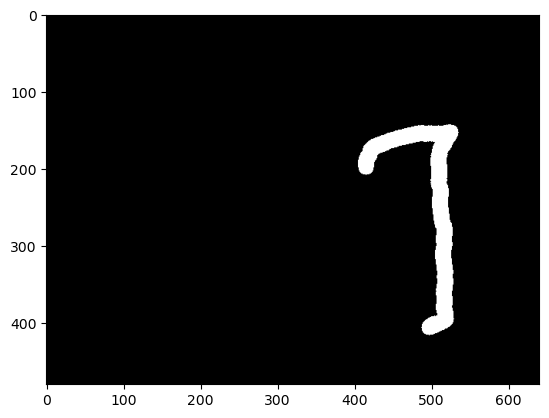

In [103]:
for i in Writers:
    new_img=np.zeros((480,640,3),dtype=np.uint8)
    new_img = i.draw2(new_img,(255,255,255))

    cv2.imshow("Image", new_img)
    plt.imshow(new_img)

In [104]:
# def preprocess_image(img):
    
#     #display the image
#     # plt.imshow(img.squeeze(), cmap='gray')
#     # plt.show()
#     img = cv2.resize(img, (28, 28))
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
#     img = cv2.GaussianBlur(img, (5,5), 0)
#     # img = cv2.GaussianBlur(img, (3,3), 0)
   
#     img = img.reshape(1, 28, 28, 1)  
#     # plt.imshow(img.squeeze(), cmap='gray')
#     # plt.show()
#     return img

# import matplotlib.pyplot as plt

def preprocess_image(img):
    # Display the original image
    # plt.imshow(img, cmap='gray')
    # plt.show()

    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))

    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding after Gaussian blur
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    _, img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Optionally display the thresholded image
    # plt.imshow(img, cmap='gray')
    # plt.show()

    # Reshape the image to fit the model input
    img = img.reshape(1, 28, 28, 1)

    return img

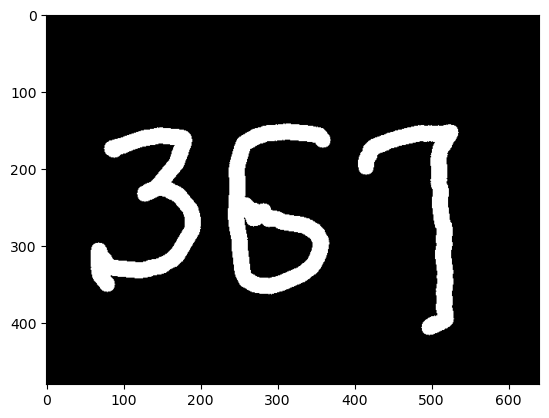

In [105]:
image_for_Segmentation = np.zeros((480, 640, 3), dtype=np.uint8)
# all writers draw on this image
for i in Writers:
    image_for_Segmentation = i.draw2(image_for_Segmentation,(255,255,255))
cv2.imshow("Image", image_for_Segmentation)
plt.imshow(image_for_Segmentation)



68 190 157 350
(640, 480, 3)
(213, 142, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predictions for Writer <__main__.Mypoint object at 0x0000015C9F39AE10>: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted class for Writer <__main__.Mypoint object at 0x0000015C9F39AE10>: [3]
the 
246 359 152 353
(640, 480, 3)
(221, 133, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predictions for Writer <__main__.Mypoint object at 0x0000015CA2DD46D0>: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Predicted class for Writer <__main__.Mypoint object at 0x0000015CA2DD46D0>: [6]
the 
415 525 153 406
(640, 480, 3)
(273, 75, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predictions for Writer <__main__.Mypoint object at 0x0000015CA2D7F490>: [[0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
  1.208514e-09 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
Predicted class for Writer <__main__.Mypoint object at 0x0000015CA2D7F490>: [3]
the 


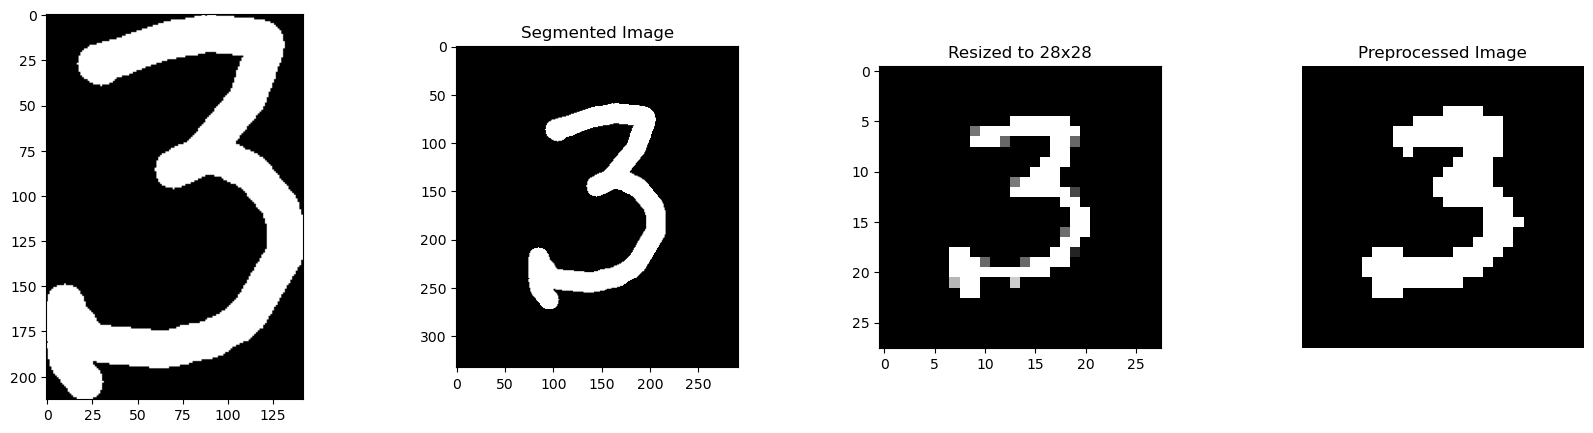

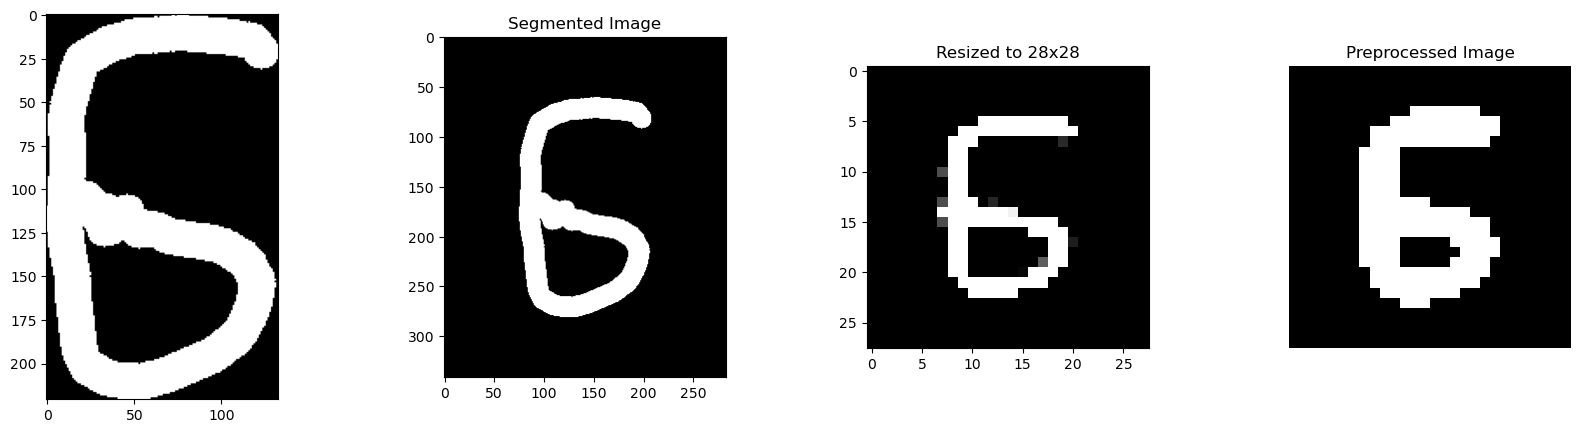

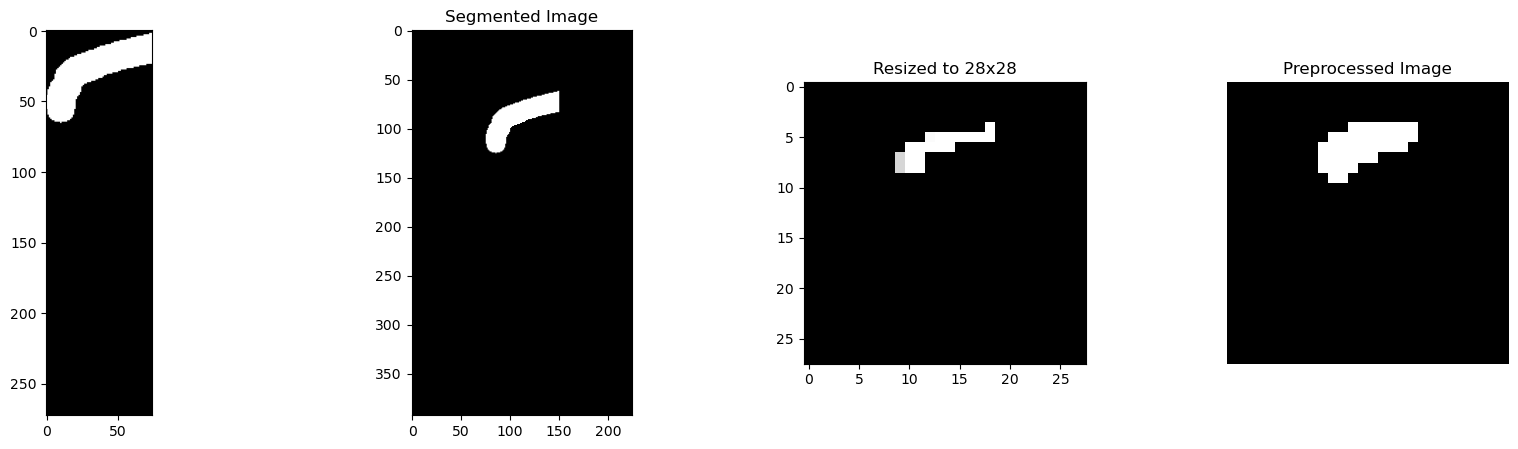

In [106]:
for i in range(len(Writers)):
        try:
            if (i==0):
                continue
            writeone= Writers[i]
            
            # if writeone.points==[]:
            #     # i+=1
            #     continue

            # aye = i
            
            
            limitx1,limitx2,limity1,limity2=Writers[i].range_points()

            if(limitx1==0 and limitx2==0 and limity1==0 and limity2==0):
                continue
            print(limitx1,limitx2,limity1,limity2)
            fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
            
            plt.axis('off')
            # cut image around the written area with some padding
            new_image_a=np.zeros((limity2-limity1+100,limitx2-limitx1+100,3),dtype=np.uint8)
            new_image_b=np.zeros((640,480,3),dtype=np.uint8)
            myimage=writeone.draw2(new_image_b, (255,255,255))
            
            # axes[0].imshow(new_image_b) 
            
            # axes[0].set_title('Visual Canvas Drawing')
            print(myimage.shape)
            cropped_image =myimage[limity1-10:limity2+10, limitx1-10:limitx2+10]
            print(cropped_image.shape)
            axes[0].imshow(cropped_image)
            
            # plt.show()
            # plt.show()
            for i in writeone.points:
            
                # add padding of 50
                new_image_a=np.pad(cropped_image,((60,60),(75,75),(0,0)),mode='constant',constant_values=0)
            
            axes[1].imshow(new_image_a)
            axes[1].set_title('Segmented Image')
            

            # resize the image to 28x28
            new_image_a=cv2.resize(new_image_a,(28,28))

            axes[2].imshow(new_image_a)
            axes[2].set_title('Resized to 28x28')
            
            processed_img = preprocess_image(new_image_a)
            predictions = model.predict(processed_img)
            axes[3].imshow(processed_img.squeeze(), cmap='gray')
            axes[3].set_title('Preprocessed Image')
            print(f"Predictions for Writer {i}: {predictions}") 
            predicted_classes = np.argmax(predictions, axis=1)
            print(f"Predicted class for Writer {i}: {predicted_classes}")

            fig.suptitle(f'Writer {aye} predicted as {predicted_classes}', fontsize=16)

    
            plt.show()
        except Exception as e:
            print("the ")
            continue


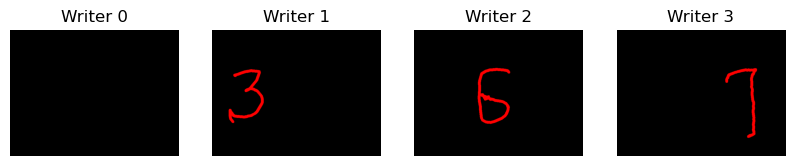

In [107]:
import matplotlib.pyplot as plt
# make images for points in each writer as separate images in subplots
# fig size 10,10
fig, axs = plt.subplots(1,len(Writers),figsize=(10,10))
# new_img=np.zeros((480,640,3),dtype=np.uint8)
# plt.imshow(new_img.squeeze(), cmap='gray')
# plt.show()
for i,Writer in enumerate(Writers):
    new_img=np.zeros((480,640,3),dtype=np.uint8)
    new_img.fill(0)
    new_img=Writer.draw(new_img)
    
    axs[i].imshow(new_img)
    axs[i].set_title('Writer '+str(i))
    axs[i].axis('off')
plt.show()


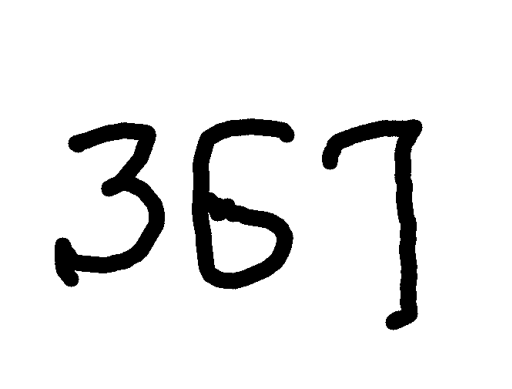

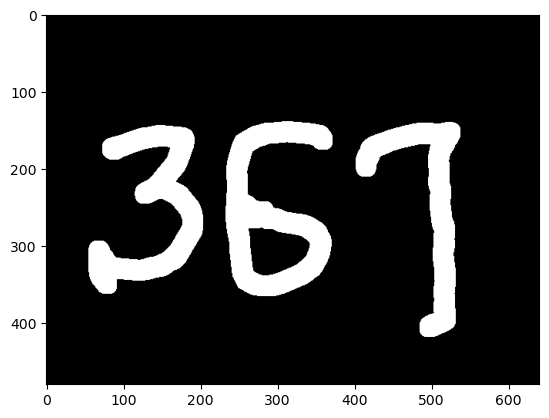

Number of contours detected: 3


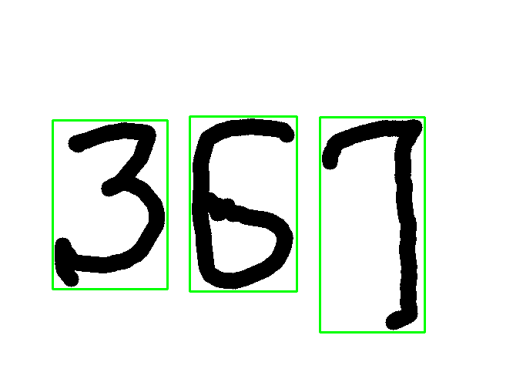

In [108]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# clear the segmented images folder
import os
import shutil
shutil.rmtree('segmented_images', ignore_errors=True)
os.makedirs('segmented_images')

# Load the image, convert it to grayscale, and blur it to remove noise
image = image_for_Segmentation

# negate the image
image = cv2.bitwise_not(image)
# show the image on plt

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.GaussianBlur(gray, (7, 7), 0)

# Threshold the image
ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Dilate the white portions
dilate = cv2.dilate(thresh, None, iterations=2)
# show the image on plt
plt.imshow(dilate, cmap='gray')

plt.show()


# Find contours in the image
contours, _ = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

orig = image.copy()
i = 0

for cnt in contours:
    # Check the area of contour; if it is very small, ignore it
    if cv2.contourArea(cnt) <3000 or cv2.contourArea(cnt) > 0.9 * image.shape[0] * image.shape[1]:
        continue

    # Filtered contours are detected
    x, y, w, h = cv2.boundingRect(cnt)

    # Taking ROI of the contour
    roi = image[y-10:y+h+10, x-10:x+w+10]
    

    # Mark them on the image if you want
    cv2.rectangle(orig, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save your contours or characters to segmented_images folder
    cv2.imwrite('segmented_images/' + str(i) + '.png', cv2.bitwise_not(roi))
    i += 1

# Convert the BGR image to RGB before displaying
orig_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
num_contours = i
print("Number of contours detected: " + str(num_contours))
# Display the image with the detected contours using pyplot
plt.axis('off')
plt.imshow(orig_rgb)
plt.show()

In [109]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [110]:
def preprocess_image(img):
    
    #display the image
    # plt.imshow(img.squeeze(), cmap='gray')
    # plt.show()

    #add padiing to all the sides
    img = np.pad(img, ((60,60), (69,69)), 'constant', constant_values=(0,0))
    img = cv2.resize(img, (28, 28))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    img = cv2.GaussianBlur(img, (3,3), 0)
    # img = cv2.GaussianBlur(img, (3,3), 0)
   
    img = img.reshape(1, 28, 28, 1)  
    # plt.imshow(img.squeeze(), cmap='gray')
    # plt.show()
    return img





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted: 3


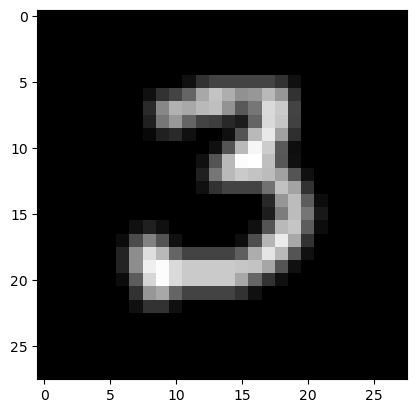




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted: 7


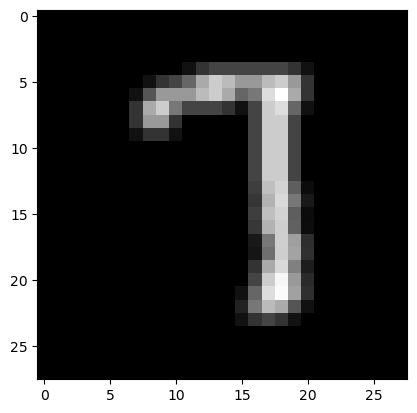




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted: 6


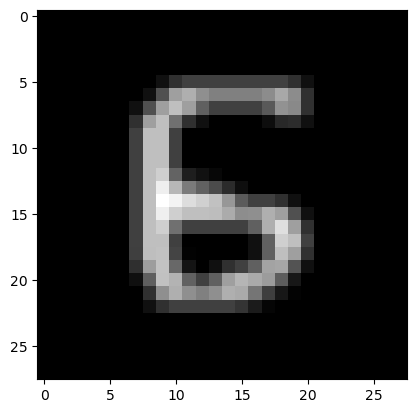

In [111]:
folder_path = 'segmented_images/'

for imag in range(num_contours):
    img = cv2.imread(folder_path + str(imag) + '.png', cv2.IMREAD_GRAYSCALE)
    img = preprocess_image(img)
    pred = model.predict([img])
    print("Predicted: " + str(pred.argmax()))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.show()
    print("\n\n")

# Enclosed area detection in images

## Algorithm

In [112]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def detect_enclosed_areas(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.axis('off')
    # Display the image with contours
    plt.imshow(image, cmap='gray')
    plt.show()
    if image is None:
        print("Image not found")
        return

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty image to draw contours
    contour_image = np.zeros_like(image)

    # Draw all contours
    cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 1)
    plt.axis('off')
    # Display the image with contours
    plt.imshow(contour_image, cmap='gray')
    plt.show()


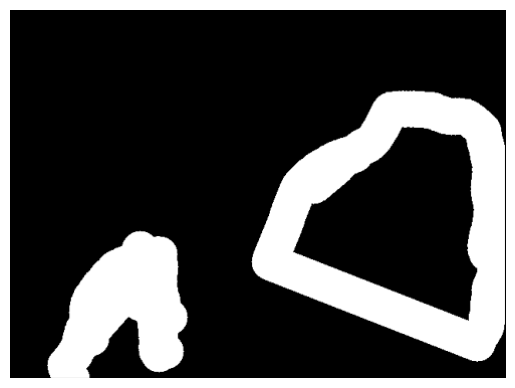

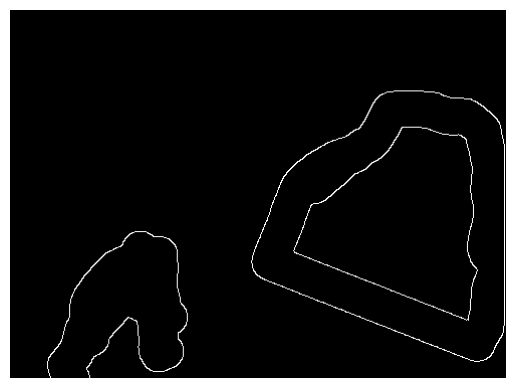

In [113]:
if __name__ == "__main__":
    
    detect_enclosed_areas("images\image copy 7.png")

In [114]:
# #destroy all windows
cv2.destroyAllWindows()